# Logistic Regression for Hardware Failure Prediction
This notebook demonstrates an end-to-end implementation of logistic regression to predict hardware failures based on sensor data.

In [3]:
# 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# 2. Load and Inspect Data
# Load data
data = pd.read_csv('large_hardware_data.csv')
# Display first few rows
print(data.head())
# Check for missing values
print(data.isnull().sum())


   temperature  vibration   voltage   current  operating_hours  error_rate  \
0    74.981605   0.004363  3.383999  1.319072       667.932878    0.042515   
1    98.028572   0.003996  2.947610  1.229646       280.153773    0.025231   
2    89.279758   0.002585  3.077312  1.482249       340.082527    0.010578   
3    83.946339   0.006465  3.330625  1.109489       443.275144    0.037095   
4    66.240746   0.005290  3.185671  1.293928       486.941335    0.021515   

   failure  
0        0  
1        0  
2        1  
3        1  
4        1  
temperature        0
vibration          0
voltage            0
current            0
operating_hours    0
error_rate         0
failure            0
dtype: int64


In [5]:
# 3. Data Preprocessing
# Fill or drop missing values if any (though we know there aren't any)
data = data.dropna()  # or data.fillna(method='ffill', inplace=True)




In [6]:
# Separate features and target variable
X = data.drop('failure', axis=1)
y = data['failure']



In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# 4. Train Logistic Regression Model
# Initialize and train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



LogisticRegression()

In [10]:
# Predict on test data
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


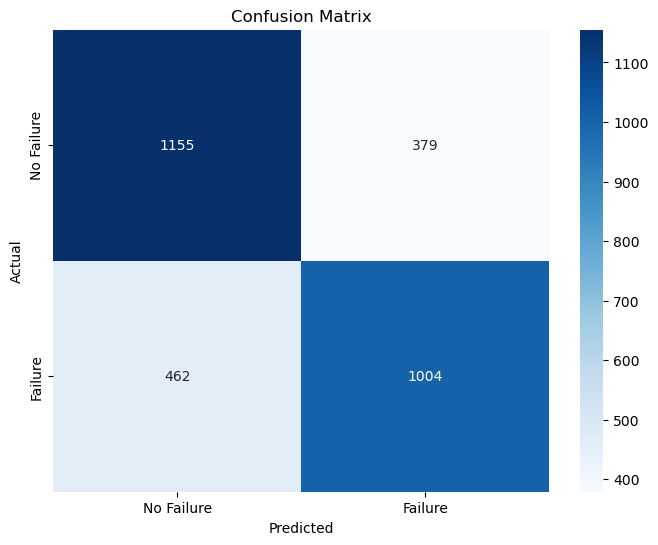

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      1534
           1       0.73      0.68      0.70      1466

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [11]:
# 5. Evaluate the Model
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))




In [12]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.72


In [13]:

# Additional evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')



Precision: 0.73
Recall: 0.68
F1 Score: 0.70


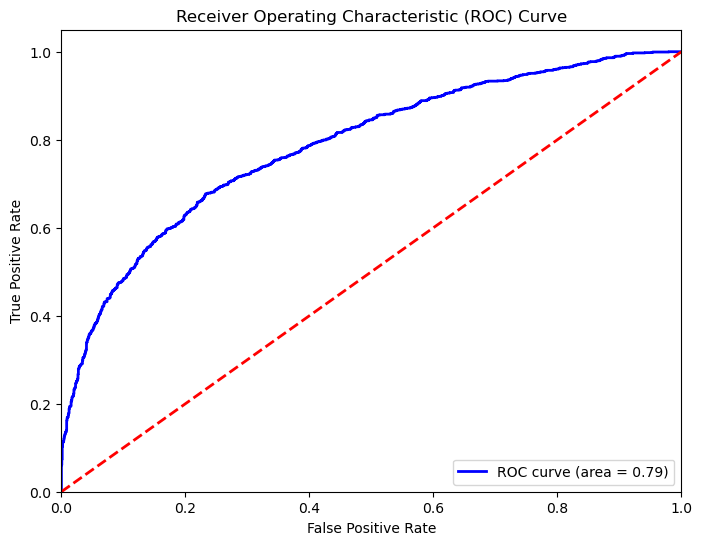

In [14]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [15]:
# 6. Feature Importance (Optional)
# Get feature importance
importance = log_reg.coef_[0]
features = X.columns



In [16]:
# Create a dataframe for better visualization
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)



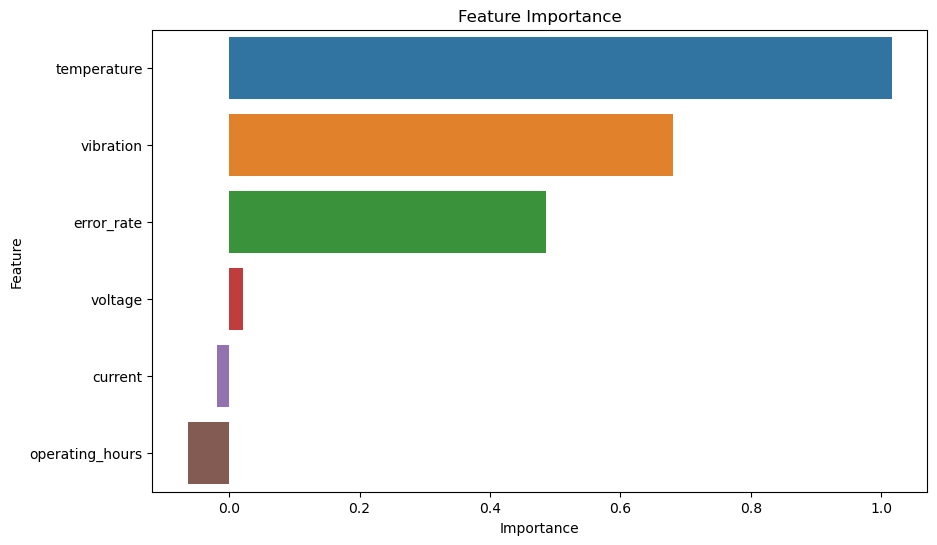

In [17]:

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()